# Data Science 3870 Final Project
### Authors: Sam Alamutu, Polina Grushia, Brenna Henry, Elisabeth Kollrack, Ellie Sheppard
#### 04/27/2025

## Introduction
##### Our project focused on analyzing the “Crime Incidents in 2024” dataset, which is a detailed record of crimes reported to the Maryland Police Department and made available on Data.gov. Entries in the dataset include the type of offense, date, and time it occurred, and its location. Some entries also include information about the status of the crime and outcomes of the incident. We aimed to answer the following question: What factors affect the type of offense committed? Using variables such as time and date, location, and other available information, we gained insight into the relationships between the context and the crime committed. Understanding these relationships can help develop strategies to increase public safety and allocate resources more effectively.

In [64]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

The code below will load in the crime data from DC in 2024

In [65]:
# Reading in the data
crime = pd.read_csv("Crime_Incidents_in_2024.csv")
print(crime.shape)
crime.head(10)

(29294, 25)


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,399622.2700,134352.6200,24093246,2024/06/19 14:52:56+00,DAY,OTHERS,THEFT/OTHER,1100 - 1199 BLOCK OF NEW JERSEY AVENUE SE,399622.270000,134352.620000,...,007203 1,7203.0,Precinct 131,38.877004,-77.004353,CAPITOL RIVERFRONT,2024/06/19 14:50:00+00,2024/06/19 14:52:00+00,679448603,NaN
1,398579.1351,134828.4000,24131497,2024/08/27 01:13:37+00,EVENING,OTHERS,THEFT F/AUTO,300 - 399 BLOCK OF G STREET SW,398579.135069,134828.399995,...,010500 2,10500.0,Precinct 128,38.881289,-77.016376,SOUTHWEST,2024/08/26 18:51:00+00,2024/08/26 20:14:00+00,679448604,NaN
2,396836.0500,139850.4600,24120734,2024/08/07 07:10:35+00,MIDNIGHT,OTHERS,THEFT/OTHER,16TH STREET NW AND COLUMBIA ROAD NW,396836.050011,139850.459999,...,003901 1,3901.0,Precinct 39,38.926525,-77.036488,NaN,2024/08/04 01:00:00+00,2024/08/04 01:30:00+00,679449098,NaN
3,398010.0800,138818.9400,24168124,2024/10/30 03:40:30+00,MIDNIGHT,OTHERS,THEFT/OTHER,2000 - 2099 BLOCK OF 8TH STREET NW,398010.080000,138818.940000,...,003500 3,3500.0,Precinct 37,38.917236,-77.022946,NaN,2024/10/29 04:00:00+00,2024/10/29 20:00:00+00,679449103,NaN
4,397424.6800,141258.2500,24172277,2024/11/05 23:15:06+00,EVENING,OTHERS,MOTOR VEHICLE THEFT,3900 - 3999 BLOCK OF 13TH STREET NW,397424.680000,141258.250000,...,002503 1,2503.0,Precinct 47,38.939209,-77.029705,NaN,2024/11/05 22:22:00+00,NaN,679449104,NaN
5,394459.1800,141888.0400,24179469,2024/11/18 22:40:03+00,EVENING,OTHERS,THEFT/OTHER,4227 - 4399 BLOCK OF CONNECTICUT AVENUE NW,394459.180000,141888.040000,...,001303 1,1303.0,Precinct 34,38.944869,-77.063916,NaN,2024/11/18 22:07:00+00,2024/11/18 22:07:00+00,679449116,NaN
6,393720.8600,140689.0000,24074542,2024/05/18 16:39:42+00,DAY,OTHERS,THEFT/OTHER,3300 - 3399 BLOCK OF WISCONSIN AVENUE NW,393720.860000,140689.000000,...,001002 4,1002.0,Precinct 29,38.934062,-77.072422,NaN,2024/05/18 15:15:00+00,2024/05/18 15:25:00+00,679449118,NaN
7,399930.5000,143088.2800,24075222,2024/05/20 02:29:20+00,EVENING,OTHERS,THEFT/OTHER,5500 - 5529 BLOCK OF SOUTH DAKOTA AVENUE NE,399930.500000,143088.280000,...,009507 1,9507.0,Precinct 65,38.955698,-77.000802,NaN,2024/05/19 21:10:00+00,2024/05/20 00:12:00+00,679449119,NaN
8,397431.2200,138854.6100,24079135,2024/05/26 10:13:12+00,MIDNIGHT,GUN,ROBBERY,2000 - 2099 BLOCK OF 13TH STREET NW,397431.220000,138854.610000,...,004401 2,4401.0,Precinct 22,38.917556,-77.029621,NaN,2024/05/26 08:34:00+00,2024/05/26 10:08:00+00,679449120,NaN
9,400530.2627,132799.0566,24080364,2024/05/28 16:07:17+00,DAY,OTHERS,THEFT F/AUTO,2400 - 2499 BLOCK OF SHANNON PLACE SE,400530.262718,132799.056569,...,007401 1,7401.0,Precinct 119,38.863009,-76.993890,ANACOSTIA,2024/05/28 15:15:00+00,2024/05/28 15:25:00+00,679449121,NaN


In [66]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29294 entries, 0 to 29293
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     29294 non-null  float64
 1   Y                     29294 non-null  float64
 2   CCN                   29294 non-null  int64  
 3   REPORT_DAT            29294 non-null  object 
 4   SHIFT                 29294 non-null  object 
 5   METHOD                29294 non-null  object 
 6   OFFENSE               29294 non-null  object 
 7   BLOCK                 29294 non-null  object 
 8   XBLOCK                29294 non-null  float64
 9   YBLOCK                29294 non-null  float64
 10  WARD                  29290 non-null  float64
 11  ANC                   29290 non-null  object 
 12  DISTRICT              28549 non-null  float64
 13  PSA                   28826 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  29290 non-null  object 
 15  BLOCK_GROUP        

### Data Cleaning

In the next few code blocks we cleaned up the data to improve usability and clarify the feature labels. A detailed list explaining the labels can be found under “Feature Description”. For example, “CCN” means criminal complaint number, a unique identifier assigned by MPD to each incident. We dropped features we did not intend to use, such as block and report date, were dropped, and dates and times were converted to a standard 24-hour clock for readability. Some features were renamed to clarify what they are, such as “X” to “x_coordinate”.

In [67]:
# making dates and times easier to read
crime['date'] = pd.to_datetime(crime['REPORT_DAT']).dt.date
crime['time'] = pd.to_datetime(crime['REPORT_DAT']).dt.time

crime['start_date'] = pd.to_datetime(crime['START_DATE']).dt.date
crime['end_date'] = pd.to_datetime(crime['END_DATE']).dt.date
crime['start_time'] = pd.to_datetime(crime['START_DATE']).dt.time
crime['end_time'] = pd.to_datetime(crime['END_DATE']).dt.time


In [68]:
# dropping unnecessary features
crime.drop(['XBLOCK','YBLOCK', 'BLOCK_GROUP', 'BLOCK', 'PSA',
                    'ANC','LATITUDE','LONGITUDE','CENSUS_TRACT',
                    'BID','OBJECTID','OCTO_RECORD_ID','VOTING_PRECINCT',
                    'START_DATE', 'END_DATE','REPORT_DAT'], axis=1, inplace=True)

crime = crime.dropna()
crime.head()

,X,Y,CCN,SHIFT,METHOD,OFFENSE,WARD,DISTRICT,NEIGHBORHOOD_CLUSTER,date,time,start_date,end_date,start_time,end_time
0,399622.2700,134352.62,24093246,DAY,OTHERS,THEFT/OTHER,8.0,1.0,Cluster 27,2024-06-19,14:52:56,2024-06-19,2024-06-19,14:50:00,14:52:00
1,398579.1351,134828.40,24131497,EVENING,OTHERS,THEFT F/AUTO,6.0,1.0,Cluster 9,2024-08-27,01:13:37,2024-08-26,2024-08-26,18:51:00,20:14:00
2,396836.0500,139850.46,24120734,MIDNIGHT,OTHERS,THEFT/OTHER,1.0,3.0,Cluster 2,2024-08-07,07:10:35,2024-08-04,2024-08-04,01:00:00,01:30:00
3,398010.0800,138818.94,24168124,MIDNIGHT,OTHERS,THEFT/OTHER,1.0,3.0,Cluster 3,2024-10-30,03:40:30,2024-10-29,2024-10-29,04:00:00,20:00:00
5,394459.1800,141888.04,24179469,EVENING,OTHERS,THEFT/OTHER,3.0,2.0,Cluster 12,2024-11-18,22:40:03,2024-11-18,2024-11-18,22:07:00,22:07:00


In [69]:
# Renaming features
crime = crime.rename(columns={'X': 'x_coordinate', 'Y': 'y_coordinate','SHIFT':'shift','METHOD':'method',
                              'OFFENSE':'offense','WARD':'ward','DISTRICT':'district',
                              'NEIGHBORHOOD_CLUSTER':'neighborhood_cluster'})
crime = crime.dropna()
crime.head()

,x_coordinate,y_coordinate,CCN,shift,method,offense,ward,district,neighborhood_cluster,date,time,start_date,end_date,start_time,end_time
0,399622.2700,134352.62,24093246,DAY,OTHERS,THEFT/OTHER,8.0,1.0,Cluster 27,2024-06-19,14:52:56,2024-06-19,2024-06-19,14:50:00,14:52:00
1,398579.1351,134828.40,24131497,EVENING,OTHERS,THEFT F/AUTO,6.0,1.0,Cluster 9,2024-08-27,01:13:37,2024-08-26,2024-08-26,18:51:00,20:14:00
2,396836.0500,139850.46,24120734,MIDNIGHT,OTHERS,THEFT/OTHER,1.0,3.0,Cluster 2,2024-08-07,07:10:35,2024-08-04,2024-08-04,01:00:00,01:30:00
3,398010.0800,138818.94,24168124,MIDNIGHT,OTHERS,THEFT/OTHER,1.0,3.0,Cluster 3,2024-10-30,03:40:30,2024-10-29,2024-10-29,04:00:00,20:00:00
5,394459.1800,141888.04,24179469,EVENING,OTHERS,THEFT/OTHER,3.0,2.0,Cluster 12,2024-11-18,22:40:03,2024-11-18,2024-11-18,22:07:00,22:07:00


### Feature Description
1. **X_coordinate**: x coordinate of crime incident from MAR Geocoder, as reference to the Maryland State Plane NAD 1983 Meters.
2. **Y_coordinate**: y coordinate of crime incident from MAR Geocoder, as reference to the Maryland State Plane NAD 1983 Meters.
3. **CCN**: criminal complaint number, a unique identifer assigned by MPD to each incident.
4. **Shift**: MPD member's tour of duty associated with time the report was taken. Day shift is between 0700 and 1500, evening shift is between 1500 and 2300, and midnight shift is between 2300 and 0700.
5. **Method**: The type of weapon used to commit the crime
6. **Offense**: 
-  **Theft/auto** is specifically refering to theft within a motor vehicle.
-  **Theft/other** is various theft types beyond auto theft.
-  **Motor vehicle theft** is theft of a motor vehicle.
-  **Burglary** is unlawful entry into a structure with intent to commit a crime.
-  **Robbery** is the taking or attempting to take anything of value of a person or persons.
-  **Arson** is the act of deliberately setting fire to property.
-  **Assault w/Dangerous weapon** is involving the use of a weapon capable of harming another person.
-  **Sex abuse** is abusive sexual behavior by one person upon another.
-  **Homicide** is the killing of one person to another. 
7. **Ward**: the district's ward identifier, found from MAR (Master Address Repository) geocoder.
8. **District**: the police district.
9. **neighborhood_cluster**: homes or businesses that are grouped together on a tract of land.
10. **date**: The date the offense was reported by MPD, may be later than when the crime is actually committed.
11. **time**: the time when the report was taken.
12. **start_date**: the crime incident's start date.
13. **end_date**: the crime incident's end date.
14. **start_time**: the crime incident's start time.
15. **start_time**: the crime incident's end time.


## Exploratory Data Analysis

Next, we did an exploratory data analysis (EDA), creating graphs to find what crimes, locations, and times were dominant in the dataset and pointed us towards what might be significant. The majority of crimes were theft and nonviolent, and committed during the day (evening shift followed by daytime). We created both a heatmap and a Kernel Density Estimate (KDE) plot to represent the crime density, using the x and y coordinates as a pseudo-map. Both showed a clear center of where most crime occurs, with increased crime surrounding. The KDE plot more clearly revealed the smaller centers of crime, but we retained both visualizations as each offers useful perspectives depending on the context. Following the EDA, we ran several models to learn about the data. A more in-depth explanation of the models we used can be found below.

First, we wanted to take a look at the different types of offenses and their counts. Is one kind of crime more common than others?

In [70]:
# different types of crimes
(
    crime
    ['offense']
    .value_counts()
    .reset_index()
    .head(10) 
)

,offense,count
0,THEFT/OTHER,11872
1,THEFT F/AUTO,6246
2,MOTOR VEHICLE THEFT,4607
3,ROBBERY,1811
4,BURGLARY,885
5,ASSAULT W/DANGEROUS WEAPON,814
6,HOMICIDE,152
7,SEX ABUSE,129
8,ARSON,4


It is clear that types of thefts are the most common. This is important to note, as it may be easier in the machine learning section to classify a crime as theft/not theft.

I wanted to see how even the neighborhoods were when it comes to crimes. Did some neighborhoods have a lot more reported crimes than others?

In [71]:
# different types of neighborhoods
(
    crime
    ['neighborhood_cluster']
    .value_counts()
    .reset_index()
)

,neighborhood_cluster,count
0,Cluster 2,1954
1,Cluster 25,1786
2,Cluster 8,1528
3,Cluster 23,1505
4,Cluster 3,1451
5,Cluster 18,1276
6,Cluster 6,1218
7,Cluster 21,1165
8,Cluster 26,1024
9,Cluster 7,961


This table makes it clear that while 8 neighborhoods have counts of crimes in the 1,000s range, 50% of the clusters have counts less than 400. Still there is plenty of data here to run analyses.

This code block will find the counts of each offense for each neighborhood cluster.

In [72]:
# Get the count of each offense by neighborhood cluster
offense_counts = crime.groupby(['neighborhood_cluster', 'offense']).size().unstack(fill_value=0)
offense_counts.head()

offense,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
neighborhood_cluster,,,,,,,,,
Cluster 1,0,11,32,1,54,34,5,121,430
Cluster 10,0,2,4,0,15,2,1,89,98
Cluster 11,0,1,9,0,20,6,1,89,209
Cluster 12,0,3,5,1,20,5,1,67,173
Cluster 13,0,0,11,0,10,1,0,65,41


This data frame showed that there is not much of a difference in the types of crimes. To improve readability, next we will show a data frame of proportions to make it clear which types of offenses are most common.

The next code block prints a table showing the proportions of different crimes in the neighborhood clusters.

In [73]:
total_crimes_per_cluster = offense_counts.sum(axis=1)
# find proportions
offense_proportions = ((offense_counts.T / total_crimes_per_cluster).T).round(2)

# Print in dataframe
pd.DataFrame(offense_proportions).head()

offense,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
neighborhood_cluster,,,,,,,,,
Cluster 1,0.0,0.02,0.05,0.0,0.08,0.05,0.01,0.18,0.62
Cluster 10,0.0,0.01,0.02,0.0,0.07,0.01,0.00,0.42,0.46
Cluster 11,0.0,0.00,0.03,0.0,0.06,0.02,0.00,0.27,0.62
Cluster 12,0.0,0.01,0.02,0.0,0.07,0.02,0.00,0.24,0.63
Cluster 13,0.0,0.00,0.09,0.0,0.08,0.01,0.00,0.51,0.32


From looking at this data, it seems as if there is not much of a difference between clusters in terms of types of crimes. Theft F/Auto and Theft/Other are most common, followed by motor vehicle theft.

## Plots

## Crime type distribution
Theft-related crimes dominate the dataset, accounting for the majority of recorded incidents. Theft/Other is the most prevalent offense, with over 12,000 incidents, making up approximately 45% of all recorded crimes. Theft from Automobiles follows with around 7,000 cases (23% of total crimes). Motor Vehicle Theft ranks third, with nearly 5,000 incidents (17.5%). Robbery and Assault with a Dangerous Weapon occur far less frequently than theft-related offenses. Arson is the least common crime, making up just 0.01% of recorded incidents, followed by Sex Abuse and Homicide, both of which remain relatively rare compared to property crimes. Non-violent crimes account for over 95% of total reported offenses in DC in 2024.

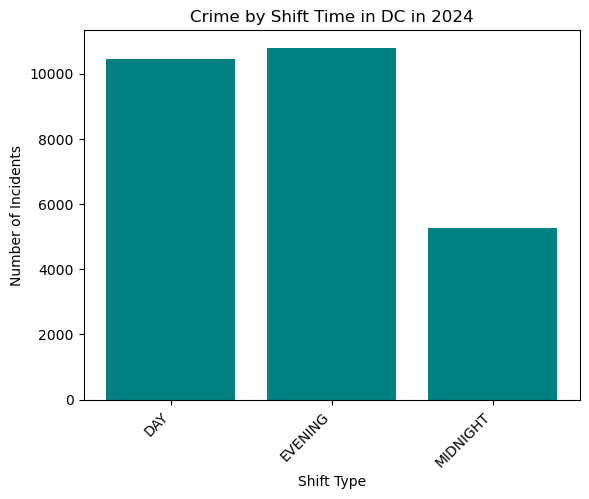

In [74]:
shift_order = ['DAY', 'EVENING', 'MIDNIGHT']
shift_counts = crime['shift'].value_counts().reindex(shift_order)

plt.bar(shift_counts.index, shift_counts.values, color='teal')
plt.xlabel("Shift Type")
plt.ylabel("Number of Incidents")
plt.title("Crime by Shift Time in DC in 2024")
plt.xticks(rotation=45, ha="right") 
plt.show()


## Crime Distribution by Time (Shift)

- Evening shift (3:00 PM – 11:00 PM) has the most incidents, with nearly 12,000 cases. This may be associated with rush hour occuring during this shift and covering early-night hours.

- Day shift (7:00 AM – 3:00 PM) follows closely behind, with approximately 11,000 incidents. This could be linked to people being more inclined to report events during the day.

- Midnight shift (11:00 PM – 7:00 AM) has the lowest number of incidents, at around 6,000 cases. This might suggest a lower number of crimes committed, however, crimes just might not be reported as often during this time.

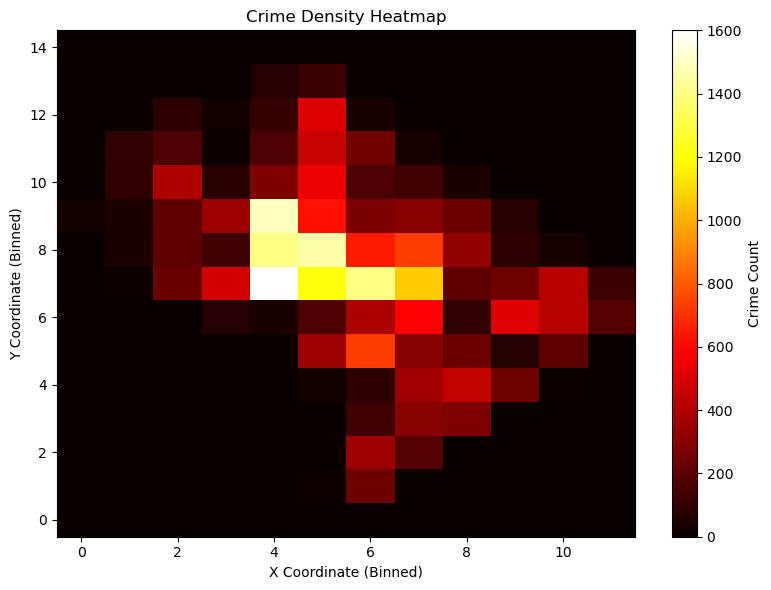

In [75]:
# Create heatmap of crime density by location

# Change bins to increase pattern visibilty in heat map
bin_size = 1500
crime['x_bin'] = (crime['x_coordinate'] // bin_size).astype(int)
crime['y_bin'] = (crime['y_coordinate'] // bin_size).astype(int)

# Group by binned coords and count
binned_df = crime.groupby(['y_bin', 'x_bin']).size().reset_index(name='crime_count')

# Pivot for heatmap
binned_heatmap = binned_df.pivot(index='y_bin', columns='x_bin', values='crime_count').fillna(0)

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(binned_heatmap, cmap='hot', aspect='auto', origin='lower')
plt.colorbar(label='Crime Count')
plt.title('Crime Density Heatmap')
plt.xlabel('X Coordinate (Binned)')
plt.ylabel('Y Coordinate (Binned)')
plt.tight_layout()
plt.show()


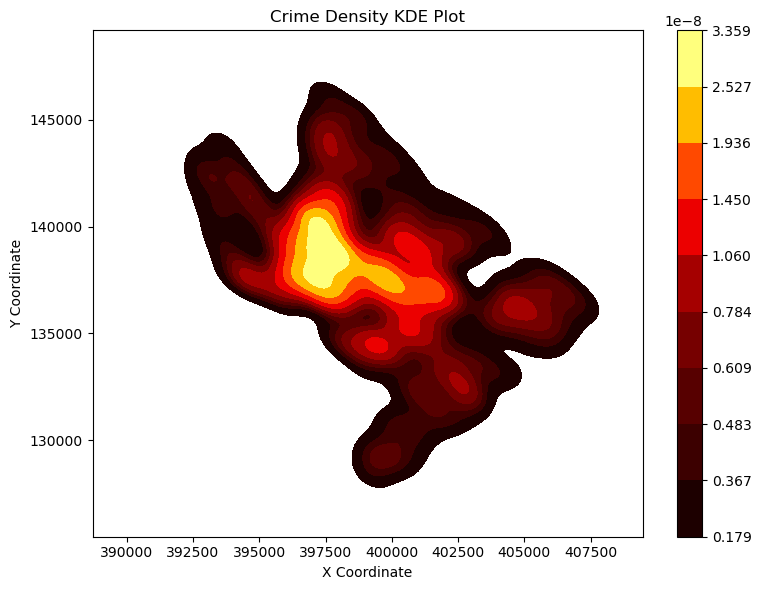

In [76]:
# Create KDE plot to represent crime density by location


plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=crime['x_coordinate'], 
    y=crime['y_coordinate'], 
    fill=True, 
    cmap='hot',
    cbar=True,
    thresh=0.05
)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Crime Density KDE Plot')
plt.tight_layout()
plt.show()


## Machine Learning

## Logistic Regression

The first model we used was a logistic regression, predicting whether the crime was theft or not. Offenses were grouped into theft and non-theft, and categorical features were one-hot encoded. 

In [77]:
crime3 = crime.copy()

# Create start_hour and duration_minutes
crime3['start_hour'] = pd.to_datetime(crime3['start_time'], format='%H:%M:%S').dt.hour
crime3['start_dt'] = pd.to_datetime(crime3['start_time'], format='%H:%M:%S', errors='coerce')
crime3['end_dt'] = pd.to_datetime(crime3['end_time'], format='%H:%M:%S', errors='coerce')
crime3['duration_minutes'] = ((crime3['end_dt'] - crime3['start_dt']).dt.total_seconds() / 60).fillna(0)

# Fix negative durations when end_date is different from start_date
fixes = (crime3['duration_minutes'] < 0) & (crime3['end_date'] > crime3['start_date'])
crime3.loc[fixes, 'duration_minutes'] += 1440

# Grouping crimes into 'Theft' and 'Non-theft'
theft_crimes = ['THEFT/OTHER', 'THEFT F/AUTO', 'MOTOR VEHICLE THEFT']
crime3['offense_grouped'] = crime3['offense'].apply(lambda x: 'Theft' if x in theft_crimes else 'Non-theft')


# Set up features and target
features = ['x_bin', 'y_bin', 'start_hour', 'shift', 'duration_minutes']
X = crime3[features]
y = crime3['offense_grouped']  # Use the binary offense grouping (Theft vs Non-theft)

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['shift'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Binary Logistic Regression with class weights (so theft doesn't overule)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Non-theft       0.25      0.63      0.36      1141
       Theft       0.92      0.69      0.79      6815

    accuracy                           0.68      7956
   macro avg       0.59      0.66      0.57      7956
weighted avg       0.82      0.68      0.73      7956



Using LogisticRegression from sklearn and a 70/30 training-testing split, logistic regression was able to predict theft or not with an overall accuracy of 68%. The precision for theft crimes was high, but non-theft crimes had a low precision and many were false positives (thinking a crime was theft when it was not). Overall, the logistic regression model wasn’t the best for our data and lacked accuracy in comparison to others.

### XGBOOST

The next model we tried was XGboost. XGboost uses gradient boosting for decision trees. The target variable “neighborhood cluster” was encoded and features were converted to dummy variables.

In [78]:
crime1 = crime.copy()


# Encode the target variable 'neighborhood_cluster' - as it is categorical
le_cluster = LabelEncoder()
crime1['neighborhood_cluster'] = le_cluster.fit_transform(crime1['neighborhood_cluster'])

# Convert features to dummies vars
categorical_cols = ['shift', 'method', 'offense', 'ward', 'district']
crime1 = pd.get_dummies(crime1, columns=categorical_cols)

# Drop unnecessary columns
# Drop CCN as it was 3rd most important feature in chart below
X = crime1.drop(columns=[
    'neighborhood_cluster', 'date', 'time', 'start_date', 'end_date', 
    'start_time', 'end_time', 'CCN'
], errors='ignore')

y = crime1['neighborhood_cluster']

# Split data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# XGBoost model using best parameters
model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=7,
    n_estimators=100,
    subsample=1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Fit model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9811463046757164
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       138
           1       1.00      0.95      0.98        42
           2       0.96      0.99      0.97        67
           3       0.98      0.98      0.98        55
           4       0.89      0.92      0.91        26
           5       0.97      0.97      0.97        67
           6       1.00      1.00      1.00        83
           7       1.00      0.96      0.98        28
           8       0.98      0.97      0.97       163
           9       0.98      0.97      0.98       255
          10       0.95      0.99      0.97        82
          11       0.99      0.99      0.99       391
          12       1.00      0.97      0.98        63
          13       0.99      1.00      1.00       233
          14       0.98      0.97      0.97       179
          15       0.99      0.99      0.99       301
          16       0.93     

With and 80/20 training testing split, the XGBClassifier from sklearn was run and had a 98% accuracy (meaing 98% of test cases were correctly classified). A macro average of 92% means that my model does well even accross small and rare clusters. A 98% weighed average means that the model was especially good for larger clusters.

Next, we will see what features are valuable when predicting neighborhood cluster.

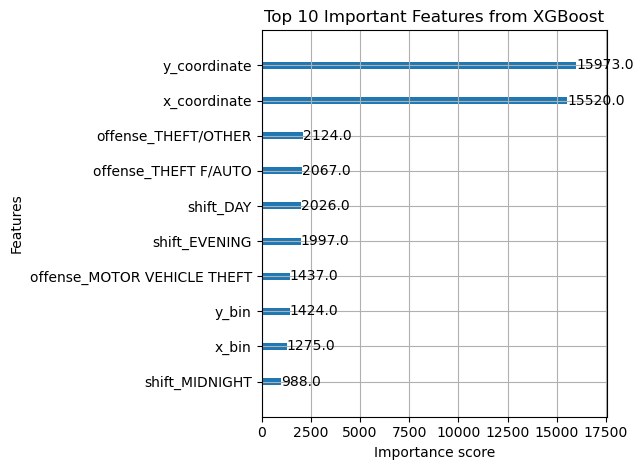

In [79]:

# See which features are most important in predicting cluster
plot_importance(model, max_num_features=10)
plt.title("Top 10 Important Features from XGBoost")
plt.tight_layout()
plt.show()


The graph shows the y and x coordinates as the most important features. As these are the obvious answers in predicting neighborhood, it is important to note the next three most important features are offense theft/other, offense theft/auto, and day shift. This suggests that the type of crime and time of day are characteristic to the specific neighborhoods.

Note: CCN was 3rd most important, so I removed it.

### Grid Search to find best parameters - NOTE: Grid Search takes around 7 minutes to run

We then ran a grid search, looking to find the best hyper parameters to optimize XGBoost. 

In [80]:
# Conduct a grid search to find the best hyper parameters

# Base model
xgb_model = XGBClassifier(eval_metric='mlogloss')

# Parameter grid to search through
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:\n", grid_search.best_params_)

# Best estimator performance
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Print estimator performance
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters:
 {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}
Tuned Model Accuracy: 0.9802036199095022
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       138
           1       1.00      0.95      0.98        42
           2       0.96      0.99      0.97        67
           3       0.98      0.98      0.98        55
           4       0.89      0.92      0.91        26
           5       0.97      0.96      0.96        67
           6       0.99      1.00      0.99        83
           7       1.00      0.96      0.98        28
           8       0.98      0.98      0.98       163
           9       0.98      0.97      0.97       255
          10       0.94      0.98      0.96        82
          11       0.98      0.99      0.99       391
          12       0.98      0.97      0.98        63

It found the best parameters were max depth 5, learning rate 0.1, n estimators 100, sumsample 1, and colsample_bytree 1. 

### Test Accuracy with "best" parameters

In [81]:
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Final Model Accuracy: 0.9802036199095022
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       138
           1       1.00      0.95      0.98        42
           2       0.96      0.99      0.97        67
           3       0.98      0.98      0.98        55
           4       0.89      0.92      0.91        26
           5       0.97      0.96      0.96        67
           6       0.99      1.00      0.99        83
           7       1.00      0.96      0.98        28
           8       0.98      0.98      0.98       163
           9       0.98      0.97      0.97       255
          10       0.94      0.98      0.96        82
          11       0.98      0.99      0.99       391
          12       0.98      0.97      0.98        63
          13       0.99      1.00      0.99       233
          14       0.99      0.96      0.97       179
          15       0.99      0.98      0.99       301
          16    

Using the best parameters the grid search found, the XGBoost model was again able to achieve 98% accuracy for both testing, and cross-validated mean. The training and testing accuracy remained close, which suggests that overfitting was reduced.

In [82]:
# Check cross validating accuracy
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

# Check training and testing accuracy
train_pred = model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))


Cross-validated accuracy scores: [0.98208899 0.97869532 0.98058069 0.97888386 0.98152338]
Mean accuracy: 0.9803544494720965
Train Accuracy: 0.9957579185520362
Test Accuracy: 0.9802036199095022


The final model accurately classified neighborhood clusters with a test accuracy of 98.04%

Based on the accuracy scores above, the model performs well. After adjusting parameters from the Grid Search, the model improved and hopfully reduces overfitting.

## Random Forest

A random forest builds lots of decision trees with different samples of the data and subsets of features. To make a prediction,the model uses the majority (or plurality). 

The next code chunk will group crimes into theft and not theft and will dummy code the categorical variables with a label encoder. It also adds a couple features like start_time and duration_minutes to better predict the type of offense.

In [83]:
# Starting with creating a new dataframe to add variables to
crime2 = crime.copy()

# grouping non common crimes and leaving the popular songs separate
theft_crimes = ['THEFT/OTHER', 'THEFT F/AUTO', 'MOTOR VEHICLE THEFT']
crime2['offense_grouped'] = crime2['offense'].apply(lambda x: 'Theft' if x in theft_crimes else 'Non-theft')

# Convert string times to datetime and extract hour
crime2['start_hour'] = pd.to_datetime(crime2['start_time'], format='%H:%M:%S').dt.hour
crime2['date'] = pd.to_datetime(crime2['date'])
crime2['day_of_week'] = crime2['date'].dt.weekday

crime2['start_dt'] = pd.to_datetime(crime2['start_time'], format='%H:%M:%S', errors='coerce')
crime2['end_dt'] = pd.to_datetime(crime2['end_time'], format='%H:%M:%S', errors='coerce')
crime2['duration_minutes'] = ((crime2['end_dt'] - crime2['start_dt']).dt.total_seconds() / 60).fillna(0)

# Fix the negative durations when end_date is different than start_date
fixes = (crime2['duration_minutes'] < 0) & (crime2['end_date'] > crime2['start_date'])
crime2.loc[fixes, 'duration_minutes'] += 1440

# Encode categorical variables
categorical_cols = ['shift', 'method', 'ward', 'district', 'neighborhood_cluster']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    crime2[col] = le.fit_transform(crime2[col].astype(str))
    label_encoders[col] = le


features = ['neighborhood_cluster', 'shift', 'method', 'ward', 'district',
            'start_hour', 'day_of_week', 'duration_minutes']


This code block just made new variables to be easier to work with. The possible features I will use to predict offense are shift, method, ward, district, neighborhood cluster, duration_minutes, day_of_week and start hour. I will eventually tune the random forest to find which features are the most important. 

Below is the first random forest I created. It uses all the variables, no max depth, and 100 trees.

In [84]:
X = crime2[features]
y = crime2['offense_grouped']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3870)

# Random Forest
clf = RandomForestClassifier(
    n_estimators=100, max_depth=None, 
    random_state=3870, n_jobs=-1).fit(
        X_train, y_train)
clf.score(X_test, y_test)

0.9216943187531422

 With a train/test split of 70/30, it was able to achieve an accuracy of 92.2%. Meaning that the test data could correctly predict the category of crime 92% of the time

The next code block finds the importance of the different features.

In [85]:
feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf.feature_importances_
}).sort_values(by = 'importance', ascending = False)

feat_imp

,feature,importance
2,method,0.394385
7,duration_minutes,0.225765
5,start_hour,0.130607
6,day_of_week,0.080178
0,neighborhood_cluster,0.074453
1,shift,0.039921
3,ward,0.027735
4,district,0.026956


It seems as if only method, start hour, and duration are helpful in determining the type of crime. 

To improve accuracy, I will try to use a grid search using the code from class. This code will try a bunch of different combination of hyperparameters for the forest and find which ones create a tree with the highest accuracy when fitting the model.

Note: I will use a RandomizedSearchCV to make the search go faster.

In [86]:
hyper_grid = {
    'n_estimators': [300, 400, 500],
    'max_features': np.arange(3, len(features)+1),
    'max_depth': [10,15, 20, 25, None],
}

cv5 = KFold(n_splits=5, shuffle=True, random_state=3870)
hp_grid_search = random_search = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=3870, n_jobs=-1),
    param_distributions=hyper_grid,
    n_iter=50,
    cv=cv5,
    scoring='accuracy',
    random_state=3870,
    n_jobs=-1
)


In [87]:
hp_grid_search.fit(X = X_train, y = y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=3870, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=3870),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20, 25, None],
                                        'max_features': array([3, 4, 5, 6, 7, 8]),
                                        'n_estimators': [300, 400, 500]},
                   random_state=3870, scoring='accuracy')

In [88]:
print(f'The best choice for the number of trees is {hp_grid_search.best_params_['n_estimators']}')
print(f'The best choice for the number of features is {hp_grid_search.best_params_['max_features']}')
print(f'The best choice for max depth is {hp_grid_search.best_params_['max_depth']}')
print(f'which has an accuracy of: {hp_grid_search.best_score_: .4f}')
importances = hp_grid_search.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

The best choice for the number of trees is 500
The best choice for the number of features is 3
The best choice for max depth is 20
which has an accuracy of:  0.9254
Feature Importances:
                feature  importance
2                method    0.308253
7      duration_minutes    0.230472
5            start_hour    0.155927
0  neighborhood_cluster    0.087095
6           day_of_week    0.085670
1                 shift    0.052956
4              district    0.039846
3                  ward    0.039780


Using a grid search slightly improved accuracy to 92.5%. In addition to method, it revealed that duration and start time are also important in predicting theft.

## Conculsions

Overall, from the models used we can conclude that geographical location, timing, and method of crime are most important to predicting the type of crime committed when simplified to theft vs. not theft. From XGBoost, we learned that different neighborhoods have unique patterns in the types and times of crimes committed and from the random forest we were able to extract that duration is important as well. Method as a predictor seems strong in the random forest model, but more exploration may be needed to determine its importance as many thefts list “other” as a method, as opposed to a specific weapon. Perhaps this means they commonly used no weapon, but it cannot be concluded from the data at hand. Additionally, method may not be super useful in real applications like allocating police presence the same way geographical location and time of day such crimes get committed are.

Through cleaning, exploratory data analysis, and multiple machine learning models, we gained meaningful insights into crime patterns within the 2024 Maryland dataset. We found that geographic location, time of day, and crime method are key factors associated with different types of offenses. XGBoost and Random Forest models performed particularly well, with XGBoost excelling at location-based predictions and Random Forest identifying time and method as critical features. These results suggest that targeted, data-driven strategies could be developed to allocate resources more efficiently and enhance public safety efforts. Future work could build on this foundation by incorporating more nuanced crime categories and exploring external variables to enrich predictive modeling. 

## Limitations and Recommendations

While the models provided valuable insights, several limitations should be noted. First, the dataset only included reported crimes, which introduces potential reporting bias. So certain offenses or areas might be underreported or overrepresented. Additionally, many crimes had missing or vague feature entries (such as “method” being listed as “other”), limiting the predictive power of certain models.
Our analysis also simplified offenses into broad categories like theft vs. non-theft to make classification more feasible. However, crimes are diverse and complex. A future extension of this work could involve multi-class classification, predicting specific types of offenses rather than a binary split. 
Furthermore, while location and time were strong predictors, these are not easily adjustable factors. Future work could focus on building models that are more actionable for crime prevention efforts. For example, by identifying early warning signs based on method or duration rather than solely on geographic clustering. 
